<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/trends/ANALISIS%20FLUIDOS%20GASEOSOS%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.font_manager import json_dump
#@title CARGA DE DATA_SET

from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Trend101022.csv" #@param {type:"string"}

datos = pd.read_csv(Url,sep=";",decimal=",")#index_col=0
df=pd.DataFrame(datos)
n=100
#df.head()
#df.info()
# segmentan para la curva
for i in range(1,960):
  if i<=n:df1=df.iloc[:n]
  if (i>n and i<=2*n):df2=df.iloc[n:2*n]
  if (i>2*n and i<=3*n):df3=df.iloc[2*n:3*n]
  if (i>3*n and i<=4*n):df4=df.iloc[3*n:4*n]
  if (i>4*n and i<=5*n):df5=df.iloc[4*n:5*n]
  if (i>5*n and i<=6*n):df6=df.iloc[5*n:6*n]
  if (i>6*n and i<=7*n):df7=df.iloc[6*n:7*n]
  if (i>7*n and i<=8*n):df8=df.iloc[7*n:8*n]
  if (i>8*n and i<=9*n):df9=df.iloc[8*n:9*n]
  if (i>9*n and i<=960):df10=df.iloc[9*n:960]

def exportar(salida,Nombre):
  salida.to_excel(Nombre+".xlsx")  


  


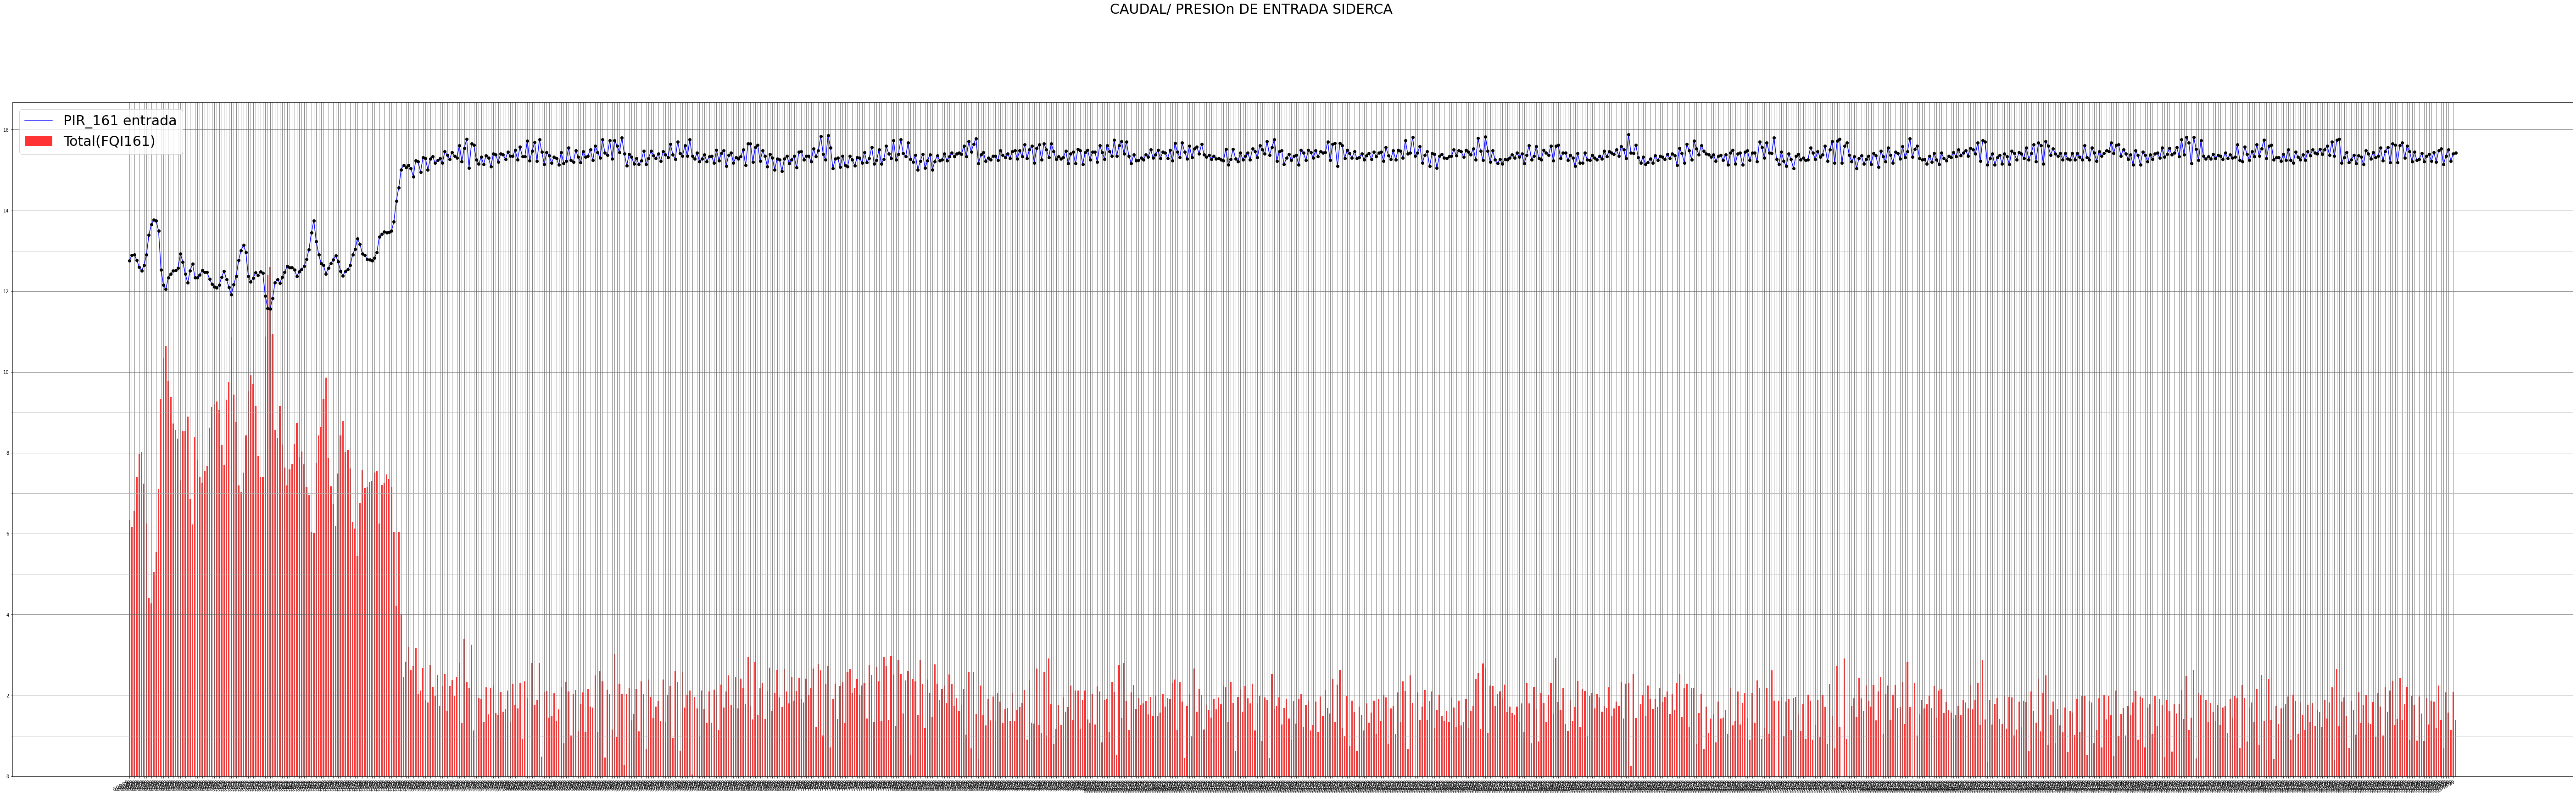

In [2]:
#@title TREND DE PRESIÓN Y CAUDAL DEL DATASET
Data_set = df #@param {type:"raw"}

# DEFINICION DE BARA EN COLORES

def GRAFICAR_Q (Data_set):
  fig, ax = plt.subplots(1, figsize=(100,30))
  fig.suptitle('CAUDAL/ PRESIOn DE ENTRADA SIDERCA',fontsize=30)
  q=Data_set.FQI161/1000
  p=Data_set.PIR161
  x=Data_set.Time
  bar1=np.arange(len(Data_set.Time))
  ax.bar(bar1,Data_set.FQI161/1000,0.6,color="red",alpha=0.8,label="Total(FQI161)")
  ax.plot(x,p ,color="blue",label="PIR_161 entrada")
  e,=ax.plot(x,p,'o',color="black")
  plt.grid(visible=True,which='major',color='#666666',linestyle='-')
  ax.yaxis.grid(True, which='minor')
  ax.yaxis.set_minor_locator(MultipleLocator(1),)
  fig.autofmt_xdate()
  ax.legend(fontsize=30)
  plt.show()
#-----------------------------------------------------------------------
def TABLA (R):
 fig_A = go.Figure(data=[go.Table(
    header=dict(values=list(R.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[R.indice, R.Date,R.Time, R.FQI161, R.PIR161,R.FQI165,R.FQI169,R.FQI177,R.FQI173,R.FQI151],
               fill_color='lavender',
               align='left'))
  ])
 fig_A.show()
GRAFICAR_Q(Data_set)

In [3]:
#@title Analisis rapidos del data_set
a=np.array(round(df.FQI161.describe(),2))
b=np.array(round(df.PIR161.describe(),2))
c=np.array(round(df.FQI165.describe(),2))
d=np.array(round(df.FQI169.describe(),2))
e=np.array(round(df.FQI177.describe(),2))
f=np.array(round(df.FQI173.describe(),2))
g=np.array(round(df.FQI151.describe(),2))
h=np.array(["count","mean","std","min","25%","50%","75%","max"])
R=np.array(["Features","FQI161","PIR161","FQI165","FQI169","FQI177","FQI173","FQI151"])
ke=np.array([h,a,b,c,d,e,f,g])
dfD= pd.DataFrame(ke.T,columns=R)  

def TABLA1 (R):
 fig_A1 = go.Figure(data=[go.Table(
    header=dict(values=list(R.columns),
                fill_color='lightgray',
                align='left'),
    cells=dict(values=[R.Features,R.FQI161, R.PIR161,R.FQI165,R.FQI169,R.FQI177,R.FQI173,R.FQI151],
               fill_color='beige',
               align='left'))
  ])
 fig_A1.show()

print('Analisis rapidos.' )


TABLA1(dfD)


Analisis rapidos.


In [14]:
#@title Paginado de DataFrame.(10 paginas_ dfx)
dfx = df4 #@param {type:"raw"}
print('Paginado de regristros.' )
print('Cantidad de registro:   ',dfx.indice.value_counts())
TABLA(dfx)



Paginado de regristros.
Cantidad de registro:    301    1
364    1
374    1
373    1
372    1
      ..
331    1
330    1
329    1
328    1
400    1
Name: indice, Length: 100, dtype: int64


In [9]:
#@title Exportar Tabla de paginado
Name = "df1" #@param {type:"string"}
exportar(dfx,Name)

In [ ]:
from numpy.ma import count
#@title MUESTREO DE FRAMES

#@markdown Cantidad de muestras a evaluar:
n = 30 #@param {type:"number"}
#@markdown Instrumetación (Vector de nuestreo):
Instrumento = 'FQI177' #@param {type:"raw"}
#@markdown Maximos, Minimos y condicional:
#@markdown (Completar: max , min o acotado )
Completar = "max" #@param {type:"string"}
#@markdown ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#@markdown Escribir <= o >0 según corresponda y luego el valor de corte.


condicion = ">=" #@param {type:"string"}
valor = 4500 #@param {type:"raw"}



#--- Evaluaciones_____________________

if Completar=="max": 
  dfmax=df.nlargest(n,Instrumento)
  n_muestras=dfmax.copy()
if Completar=='min': 
  dfmin=df.nsmallest(n,Instrumento)
  n_muestras=dfmin.copy()
if Completar=="acotado": 
  if condicion =='>=':
     dfa= df.loc[df.loc[:, Instrumento] >= valor]
     n_muestras=dfa.copy()
  if condicion =='<=':
     dfa= df.loc[df.loc[:, Instrumento] <= valor]
     n_muestras=dfa.copy()

print('Extracto de regristros evaluados.' )
print('Sobre el instrumento ',Instrumento,' se evaluo la condición de ',Completar)
print('Cantidad de registro evaluados:   ',count(n_muestras.indice))


#---main-----
TABLA(n_muestras)




In [ ]:
#@title Exportar Tabla analisis
Name = "" #@param {type:"string"}
exportar(n_muestras,Name)


In [ ]:
from pyparsing.helpers import string
#@title GRAFICA DE CONSUMOS EN CONDICIÓN DADA ( DISTRIBUCIÓN DE CAUDLES Y PRESIÓN)
Muestra = df1 #@param {type:"raw"}
MU=str(Muestra)
Exp = False #@param {type:"boolean"}

# DEFINICION DE BARA EN COLORES------------------------------------
def GRAFICO_BARRA(B,l):
  fig3, (ax)= plt.subplots(1, figsize=(50,20))
  bar1=np.arange(len(B.Time))
  w=0.6
  AA=1
  z=len(B)

  IND=list((B.indice.values))#-1
  x= list(B.Time.values)
  y= list((B.FQI161.values/1000)+0.25)
  j= (df.loc[0]['Date']).replace('/','')
  o='Barra_M'+l+j+".jpg"

  ax.bar(bar1,B.FQI165/1000,w,color="tab:blue",label="EAF5_(FQI165)")
  ax.bar(bar1,B.FQI169/1000,w,bottom=B.FQI165/1000,color="orange",label="EAF4_(FQI169)")
  ax.bar(bar1,B.FQI177/1000,w,bottom=(B.FQI165+B.FQI169)/1000,color="green",label="CC2_(FQI177)")
  ax.bar(bar1,B.FQI173/1000,w,bottom=(B.FQI165+B.FQI169+B.FQI177)/1000,color="red",label="CC3_()FQI173")
  ax.bar(bar1,B.FQI151/1000,w,bottom=(B.FQI165+B.FQI169+B.FQI177+B.FQI173)/1000,color="violet",alpha=AA,label="RESTO_(FQI151)")
  plt.xticks(bar1,B.Time)
  ax.plot(bar1,B.PIR161,label="PRESSURE_(PIR169)")
  r,=ax.plot(B.Time,B.PIR161,'o',color="black")
  ax.grid(visible=True,which='major',color='#666666',linestyle='-')
  ax.set_ylabel('Caudales [nm3/h',fontsize=20)
  secax_y=ax.secondary_yaxis("right",functions=None)
  secax_y.set_ylabel(r'Presiones [kg7cm2]',fontsize=20)
  

  for i in range(z):
     plt.text(x[i],y[i],str(IND[i]),fontsize=20,horizontalalignment='center',
              rotation='vertical')
     
  ax.yaxis.grid(True, which='minor')
  ax.yaxis.set_minor_locator(MultipleLocator(0.5),)
   
  fig3.autofmt_xdate()
  ax.legend(fontsize=15)

  #if Exp==1:
   
    #fig3.savefig(o)
  plt.show()
 
#------------------------------------------------------------------------
GRAFICO_BARRA(Muestra,MU)


In [ ]:
from collections.abc import ItemsView
#@title Distribución de la muestra. 
#@markdown Ingrese numero de nuestra a visualizar.
#Muestra = df10 #@param {type:"raw"}
def PIE(c,T):
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
 labels = 'EAF5_(FQI165)', 'EAF4_(FQI169)', 'CC2_(FQI177)', 'CC3_()FQI173','RESTO_(FQI151)'
 x=(c-1)
 a= (df.loc[x]['FQI165'])*(100/(df.loc[x]['FQI161']))
 b= (df.loc[x]['FQI169'])*(100/(df.loc[x]['FQI161']))
 c= (df.loc[x]['FQI177'])*(100/(df.loc[x]['FQI161']))
 d= (df.loc[x]['FQI173'])*(100/(df.loc[x]['FQI161']))
 e= (df.loc[x]['FQI151'])*(100/(df.loc[x]['FQI161']))
 j= (df.loc[x]['Date']).replace('/','')
 y='Pie_M'+str(Item)+"_"+j+".jpg"
 sizes = [a,b,c,d,e]
 explode = (0, 0.1, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
 fig4, ax4 = plt.subplots(figsize=(12,8))
 
 ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
 ax4.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

 plt.title("Distribución",fontsize=20)

 fig4.legend([str(df.loc[x]['FQI165']),
              str(df.loc[x]['FQI169']),
              str(df.loc[x]['FQI177']),
              str(df.loc[x]['FQI173']),
              str(df.loc[x]['FQI151'])],
              loc='lower right',
              fontsize=15,
              shadow=True,
              facecolor="Bisque",
              edgecolor="SandyBrown",
              title="Caudales",
              title_fontsize=14
 )
 ax4.annotate('Presión:             kg/cm2',
            xy=(1, 1),  
            xytext=(0.05, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 ax4.annotate(str(df.loc[x]['PIR161']),
            xy=(1, 1),  
            xytext=(0.14, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 
 ax4.annotate('N° de nuestra: ',
            xy=(1, 1),  
            xytext=(0.05, 0.1),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14) 
 
 ax4.annotate(str(x),
            xy=(1, 1),  
            xytext=(0.2, 0.1),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 
 ax4.annotate('Caudal Total:                   Nm3/h',
            xy=(1, 1),  
            xytext=(0.32, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 ax4.annotate(str(df.loc[x]['FQI161']),
            xy=(1, 1),  
            xytext=(0.44, 0.05),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=None,
            horizontalalignment='left',
            verticalalignment='bottom',
            fontsize=14)
 if Exp==1:
   fig4.savefig(y)
 plt.show() 

#####################################################

Item = 645 #@param {type:"number"}
Exp = True #@param {type:"boolean"}


PIE(Item,Muestra)